In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.decision_tree import DecisionTree, DecisionTreeNode
from models.null_model import NullModelClassification
from src.cross_validation import CrossValidation
from src.evaluation import Evaluation
import numpy as np

config = machine_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()

data_1 = data_processor.impute_missing_values(raw_data)

data_2 = data_1.drop(columns=['vendor_name','model_name','ERP'])

data_3 = data_processor.standardize_data(data_2,data_2,features=['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX'])

In [3]:
data_train, data_val = cross_validator.random_partition(data_3, random_state=42)

In [4]:
data = data_train.to_numpy()
X = data[:,:-1]
y = data[:,-1:]

In [5]:
from models.neural_networks import LinearNetwork

linear = LinearNetwork(config)

losses = linear.linear_regression(X,y)

In [5]:
# Add weights
bias = np.ones((X.shape[0],1))
X = np.hstack([bias,X])
W = np.random.rand(X.shape[1],1)/100

In [6]:
X@W

array([[ 7.51387629e-03],
       [ 3.16382679e-02],
       [ 1.15270257e-01],
       [-6.78421794e-03],
       [ 5.60822838e-02],
       [-1.17433139e-02],
       [-1.46214211e-02],
       [-9.84058604e-03],
       [-8.56696633e-03],
       [-1.36195358e-02],
       [-1.22081772e-02],
       [-1.09723419e-02],
       [ 2.96488578e-02],
       [ 2.49589868e-03],
       [-1.29941683e-02],
       [-1.48880813e-02],
       [ 2.36860328e-02],
       [ 2.92956443e-02],
       [ 5.87053813e-03],
       [-9.12480894e-03],
       [ 1.83043087e-02],
       [-1.50762337e-03],
       [ 2.95022601e-03],
       [-9.72891738e-03],
       [-9.14438757e-03],
       [ 8.52432020e-03],
       [-1.50672627e-03],
       [ 1.25404777e-02],
       [-1.11758397e-02],
       [-3.40260158e-03],
       [-1.31126621e-03],
       [ 3.39128543e-03],
       [-9.51573675e-04],
       [-1.22118104e-02],
       [-7.45664096e-03],
       [-1.38508731e-02],
       [-4.94327388e-03],
       [-3.77687816e-03],
       [-3.9

In [7]:
lr = 0.01
epochs = 1000
losses = []

for epoch in range(epochs):
    Scores = X @ W  # Predicted values
    residuals = y - Scores  # Residual errors
    loss = np.mean(residuals ** 2)  # Mean squared error loss
    gradient = -2 * X.T @ residuals / X.shape[0]  # Gradient of the loss w.r.t. W
    W = W - lr * gradient  # Update weights
    print(loss)
    losses.append(loss)

29109.72396791448
27228.32419676144
25518.35563599288
23962.28237915649
22544.449115997606
21250.87586346981
20069.075245292992
18987.8898374734
17997.347370754826
17088.53182437267
16253.46866205783
15485.02265394163
14776.806899478104
14123.101819067173
13518.783017814469
12959.257045654282
12440.404185540832
11958.527497046834
11510.307427803007
11092.761380929132
10703.207693980694
10339.233544884102
9998.66635367684
9679.54829633426
9380.113589200551
9098.768240123405
8834.07199583356
8584.722244867911
8349.539661813902
8127.4554022154825
7917.499678447793
7718.791565525365
7530.52990241141
7351.985169170038
7182.492233450744
7021.443871494187
6868.284979260011
6722.507398542831
6583.64529118818
6451.271001858124
6324.991356326913
6204.444348098807
6089.296171312891
5979.238562503174
5873.986417879561
5773.275656441987
5676.861302485885
5584.515763946161
5496.027285598495
5411.198558425832
5329.845468495664
5251.795970507549
5176.889072785278
5104.9739219256635
5035.908976595968
4

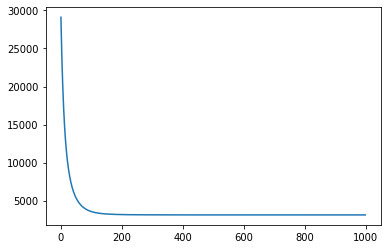

In [7]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [8]:
data_test = data_val.to_numpy()
X_test = data_test[:,:-1]
y_test = data_test[:,-1:]

# bias = np.ones((X_test.shape[0],1))
# X_test = np.hstack([bias,X_test])

In [10]:
X_test.shape

(42, 7)

In [11]:
y_test.shape

(42, 1)

In [12]:
W.shape

(7, 1)

In [13]:
Scores_new = X_test@W
MSE = np.mean((Scores_new-y_test)**2)

In [14]:
MSE

5628.720769353856

In [9]:
linear.predict_linear(X_test)